# Exercise 1

Exercise 1 of SAKI at FAU: Transaction Classification with Naive Bayes Classifier 

## Library Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.feature_selection import chi2, SelectKBest
from pathlib import Path
import matplotlib.pyplot as plt

## Load CSV File

load labeled data which is a CSV-file and show all different classes

In [2]:
data_path = Path(r'.\data.csv')
df = pd.read_csv(data_path, sep=";")

In [3]:
df["label"].unique()

array(['income', 'living', 'private', 'standardOfLiving', 'leisure',
       'finance'], dtype=object)

### Data Preperation/Cleaning

Cast data types of input data to match bag of words features and cast characteristic "Betrag" to float

In [4]:
display(df.dtypes)

Unnamed: 0                             int64
Auftragskonto                        float64
Buchungstag                           object
Valutadatum                           object
Buchungstext                          object
Verwendungszweck                      object
Beguenstigter/Zahlungspflichtiger     object
Kontonummer                           object
BLZ                                   object
Betrag                                object
Waehrung                              object
label                                 object
dtype: object

In [5]:
df["Auftragskonto"] = df["Auftragskonto"].astype(str)

df["Betrag"] = df["Betrag"].astype(str)
df["Betrag"] = df["Betrag"].apply(lambda x: x.replace(",", "."))
df["Betrag"] = df["Betrag"].astype(float)

df["Kontonummer"] = df["Kontonummer"].astype(str)
df["BLZ"] = df["BLZ"].astype(str)

## Feature Computation

### Bag of Words Features

Compute the bag of word features over the characteristic Auftragskonto, Buchungstag, Buchungstext, Verwendungszweck, Beguenstigter/Zahlungspflichtiger, Kontonummer and BLZ

Extract the characteristic and drop the labels:

In [6]:
y = df["label"]
X = df.drop("label", axis=1)

Compute bag of word features on a union of suiting characteristics:

In [7]:
def create_characteristics_union(df):
    return df["Auftragskonto"] + " , " + df["Buchungstag"] + " , " +df["Buchungstext"]+ " , "+df["Verwendungszweck"]+ " , "+df["Beguenstigter/Zahlungspflichtiger"]+ " , "+df["Kontonummer"]+ " , "+df["BLZ"]  

X = create_characteristics_union(X)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

Split the data randomly into 75% training set and 25% test set:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

CountVectorizer returns sparse matrizes, but GaussianNB can only process full numpy matrizes:

In [9]:
X_train = X_train.toarray()
X_test = X_test.toarray()

Fit the model to the data and make predictions on the test set:

In [10]:
clf = GaussianNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

## Evaluation

Print the accuracy of the classifier on the test set:

In [11]:
print(clf.score(X_test, y_test))

0.9245283018867925


do classification report, showing classical evaluation scores:

In [12]:
report = classification_report(y_test, predictions)
print(report)

                  precision    recall  f1-score   support

         finance       1.00      0.71      0.83         7
          income       1.00      1.00      1.00         5
         leisure       0.86      1.00      0.93        19
          living       1.00      0.80      0.89         5
         private       1.00      0.83      0.91         6
standardOfLiving       0.92      1.00      0.96        11

        accuracy                           0.92        53
       macro avg       0.96      0.89      0.92        53
    weighted avg       0.93      0.92      0.92        53



Plot the confusion matrix of the test set:

[[ 5  0  2  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0 19  0  0  0]
 [ 0  0  0  4  0  1]
 [ 0  0  1  0  5  0]
 [ 0  0  0  0  0 11]]


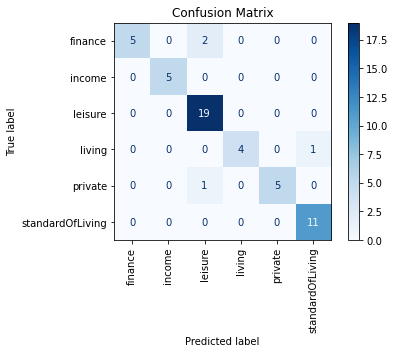

In [13]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=sorted(y_test.unique()),
                                 cmap=plt.cm.Blues, 
                            xticks_rotation='vertical')
disp.ax_.set_title("Confusion Matrix")

print(disp.confusion_matrix)

Select the 15th words with the highest chi2 score and plot them:

In [14]:
selection = SelectKBest(chi2, k=15).fit(X_train, y_train)
mask = selection.get_support()
params = selection.scores_
feature_names = vectorizer.get_feature_names()

features = list()
for m, name, p in zip(mask, feature_names, params):
    if m:
        features.append((name, p))
        
features = sorted(features, key=lambda k:k[1])
features = features[::-1]

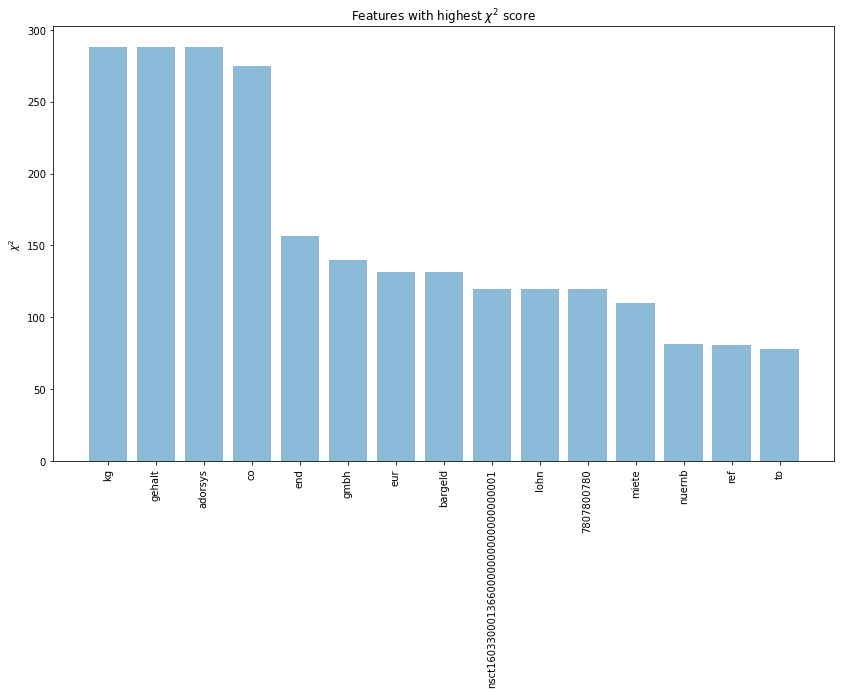

In [15]:
objects = list(map(lambda x: x[0], features))
y_pos = np.arange(len(objects))
performance = list(map(lambda x: x[1], features))

plt.figure(figsize=(14,8))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('$\chi^2$')
plt.title('Features with highest $\chi^2$ score')

plt.show()

Plot class priors of training set:

In [24]:
vectorizer = CountVectorizer()
y_count = vectorizer.fit_transform(y_train)
y_count = y_count.toarray()
countLabels = np.sum(y_count, axis=0)
priors = countLabels / countLabels.sum()
names = vectorizer.get_feature_names()
y_pos = np.arange(len(names))
print(priors)

[0.16666667 0.07692308 0.29487179 0.13461538 0.09615385 0.23076923]


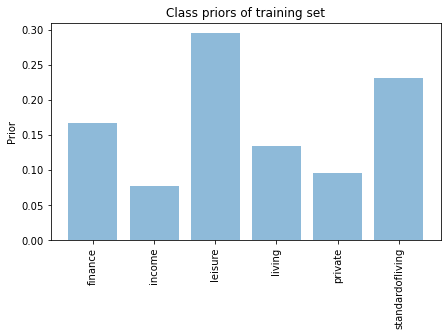

In [28]:
plt.figure(figsize=(7,4))
plt.bar(y_pos, priors, align='center', alpha=0.5)
plt.xticks(y_pos, names, rotation=90)
plt.ylabel('Prior')
plt.title('Class priors of training set')

plt.show()